In [24]:
import pandas as pd
from sodapy import Socrata
import json
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import requests as req
import random 
#Connecting to API
length_data = 468,761
app_token = "X2gMakh5B2retT4oRxgQy2A9R"
#$$app_token=" + app_token
url = ("https://data.cityofnewyork.us/resource/7x9x-zpz6.json?$limit=400000&$offset=0")

results = req.get(url).json()

#put json data into dataframe
results_df = pd.DataFrame(data = results, columns = {"boro_nm", "rpt_dt", "ofns_desc","lat_long","law_cat_cd","prem_typ_desc"})

#rename columns
cleaned_df = results_df.rename(columns = {"boro_nm":"Borough", "rpt_dt": "Report Date", "ofns_desc": "Offense Decription", "lat_long":"Location", 
                                          "law_cat_cd":"Degree Of Crime", "prem_typ_desc":"Location Type"})

cleaned_df.head()


,Location Type,Degree Of Crime,Location,Borough,Report Date,Offense Decription
0,STREET,MISDEMEANOR,NaN,BROOKLYN,2017-01-27T00:00:00.000,SEX CRIMES
1,RESIDENCE - APT. HOUSE,FELONY,NaN,BRONX,2017-03-20T00:00:00.000,SEX CRIMES
2,RESIDENCE - APT. HOUSE,FELONY,NaN,BROOKLYN,2017-03-22T00:00:00.000,RAPE
3,TRANSIT - NYC SUBWAY,MISDEMEANOR,NaN,MANHATTAN,2017-01-05T00:00:00.000,SEX CRIMES
4,STREET,MISDEMEANOR,NaN,QUEENS,2017-03-22T00:00:00.000,SEX CRIMES


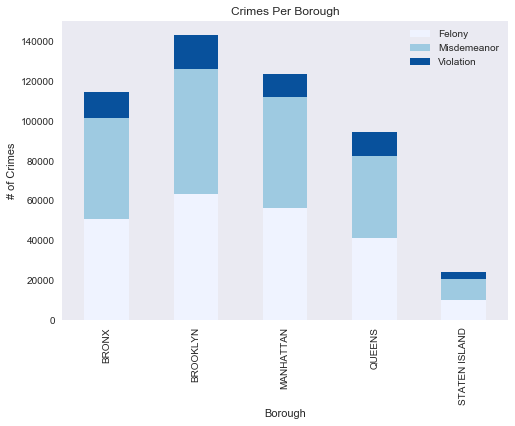

In [73]:
#MISDEMEANOR
mis_filter = cleaned_df['Degree Of Crime']=='MISDEMEANOR'
mis_final = cleaned_df[mis_filter]
borough_1_df = mis_final['Borough'].value_counts()

#FELONY
fel_filter = cleaned_df['Degree Of Crime']=='FELONY'
fel_final = cleaned_df[mis_filter]
borough_2_df = fel_final['Borough'].value_counts()

#VIOLATION
vio_filter = cleaned_df['Degree Of Crime']=='VIOLATION'
vio_final = cleaned_df[vio_filter]
borough_3_df = vio_final['Borough'].value_counts()


combined_all_df = pd.DataFrame({"Misdemeanor":borough_1_df, "Felony":borough_2_df, "Violation":borough_3_df}) 

combined_all_df
    



#plot 
colors = ["#eff3ff", "#9ecae1", "#08519c"]



combined_all_df.plot(kind='bar', stacked=True, color=colors)
plt.title("Crimes Per Borough")
plt.xlabel("Borough")
plt.ylabel("# of Crimes")
plt.show()

In [49]:
#Read CSVs and Combine to One Dataframe
file_one = "rollingsales_bronx.csv"
file_two = "rollingsales_brooklyn.csv"
file_three = "rollingsales_manhattan.csv"
file_four = "rollingsales_queens.csv"
file_five = "rollingsales_statenisland.csv"

bronx_pd = pd.read_csv(file_one)
brooklyn_pd = pd.read_csv(file_two)
manhattan_pd = pd.read_csv(file_three)
queens_pd = pd.read_csv(file_four)
staten_island_pd = pd.read_csv(file_five)
sales_df = pd.concat([manhattan_pd, bronx_pd, brooklyn_pd, queens_pd, staten_island_pd])

#Clean missing rows, change Borough numbers to names and sort out residential buildings
sales_df['BOROUGH'] = sales_df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
sales_df['BUILDING CLASS'], sales_df['CATEGORY'] = sales_df['BUILDING CLASS CATEGORY'].str.split(' ', 1).str
del (sales_df['BUILDING CLASS CATEGORY'], sales_df['BLOCK'], sales_df['LOT'],  sales_df['EASE-MENT'],  sales_df['TAX CLASS AT PRESENT'],
    sales_df['TAX CLASS AT TIME OF SALE'])
sales_df = sales_df.replace('-', np.nan).dropna(thresh=7)
sales_df = sales_df[~sales_df['BUILDING CLASS'].isin(['11A'])]
sales_df[['BUILDING CLASS']] = sales_df[['BUILDING CLASS']].apply(pd.to_numeric)
sales_df[' SALE PRICE '] = pd.to_numeric(sales_df[' SALE PRICE ']) 
#Use Loop to sort out residential buildings

# Create a list to store the data
sale_type = []

# For each row in the column,
for row in sales_df['BUILDING CLASS']:
    if row < 4 :
        sale_type.append('Residential Sale')
    elif row == 6:
        sale_type.append('Residential Sale')
    elif row == 9:
        sale_type.append('Residential Sale')
    elif row == 10:
        sale_type.append('Residential Sale')
    elif row == 12:
        sale_type.append('Residential Sale')
    elif row == 13:
        sale_type.append('Residential Sale')
    elif row == 15:
        sale_type.append('Residential Sale')
    elif row == 16:
        sale_type.append('Residential Sale')
    elif row == 17:
        sale_type.append('Residential Sale')
    else:
        # Append Other
        sale_type.append('Other')

# Create a column from the list
sales_df['sale_type'] = sale_type

sales_df = sales_df[~sales_df['sale_type'].isin(['Other'])]

sales_df.head()






,BOROUGH,NEIGHBORHOOD,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS,CATEGORY,sale_type
0,Manhattan,INWOOD,A5,49 MARBLE HILL AVENUE,,10463,1.0,0,1,1219,1224,1920,A5,635000.0,8/18/17,1,ONE FAMILY DWELLINGS,Residential Sale
1,Manhattan,WASHINGTON HEIGHTS LOWER,A9,16 SYLVAN TERRACE,,10032,1.0,0,1,673,1425,1899,A9,1560000.0,9/28/17,1,ONE FAMILY DWELLINGS,Residential Sale
2,Manhattan,HARLEM-EAST,A5,104 EAST 101 STREET,,10029,1.0,0,1,1607,1466,1890,A5,NaN,3/31/17,1,ONE FAMILY DWELLINGS,Residential Sale
3,Manhattan,HARLEM-EAST,A5,104 EAST 101ST STREET,,10029,1.0,0,1,1607,1466,1890,A5,NaN,2/4/17,1,ONE FAMILY DWELLINGS,Residential Sale
4,Manhattan,HARLEM-EAST,A9,101B EAST 97TH STREET,,10029,1.0,0,1,847,1472,1925,A9,NaN,3/7/17,1,ONE FAMILY DWELLINGS,Residential Sale


In [70]:



#Average Price Per Borough
#Dependencies



In [71]:
sns.set_style("dark")

average_price.index = average_price.index.str.title()
borough_1_df.index = borough_1_df.index.str.title()
borough_2_df.index = borough_2_df.index.str.title()
borough_3_df.index = borough_3_df.index.str.title()






average_price = sales_df.groupby(["BOROUGH"])[" SALE PRICE "].mean()

avg_price_df = pd.DataFrame(average_price)

avg_price_crime_df = pd.DataFrame({"Sale Price":average_price,"Total Crime":borough_1_df+borough_2_df+borough_3_df})
avg_price_crime_df



,Sale Price,Total Crime
BOROUGH,,
Bronx,4.018214e+05,114467
Brooklyn,9.294838e+05,143249
Manhattan,2.063293e+06,123510
Queens,5.737254e+05,94566
Staten Island,5.025262e+05,24352


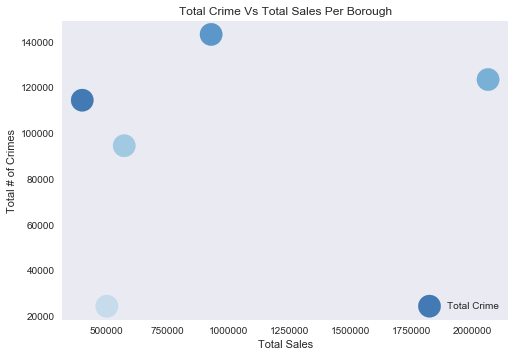

In [83]:
x = avg_price_crime_df["Sale Price"]

y = avg_price_crime_df["Total Crime"]




area = np.pi * (2000000 * np.random.rand(N))**2  # 0 to 15 point radii

blues = sns.color_palette("Blues_r")
plt.scatter(x, y, alpha=0.75, s=500, color=blues)
plt.title("Total Crime Vs Total Sales Per Borough")
plt.xlabel("Total Sales")
plt.ylabel("Total # of Crimes")
plt.legend(loc='lower right')



plt.savefig("avgprice_crime.png")


plt.show()

#print(average_price)

#plt.figure(figsize=(10,6))
#avg_price_crime_df.plot()
#plt.scatter(x, y, color="#3182bd")
#plt.title("Average Price Per Borough (2017)")

